# 1. Environment Setup

In [1]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import re
import nltk
from nltk.corpus import stopwords

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud


from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arnold\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arnold\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\arnold\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# 2. Getting the data

In [3]:
query = "(insurance OR insured OR insurer OR underwriter OR insure) -is:retweet near:Nairobi within:200km lang:en since:2020-01-01 until:2022-12-31"
tweets_list = []

In [4]:
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
   tweets_list.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username])

In [5]:
insurance_list = pd.DataFrame(tweets_list,columns =["Date","Id","Content","Username"])
insurance_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2729 entries, 0 to 2728
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Date      2729 non-null   datetime64[ns, UTC]
 1   Id        2729 non-null   int64              
 2   Content   2729 non-null   object             
 3   Username  2729 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 85.4+ KB


In [14]:
insurance_list["Date"] = pd.to_datetime(insurance_list["Date"]).dt.date
insurance_list.sort_values(by="Date",ascending=True,inplace=True)
insurance_list["Id"] = insurance_list["Id"].astype(str)
insurance_list.head()

,Date,Id,Content,Username,Hashtags,Cleaned Content,Word Count
2728,2020-01-02,1212788197161406469,"@MarvinGakunyi It has alot of humility in it, ...",dougladjuma,(),marvingakunyi it has alot of humility in it ho...,33
2727,2020-01-02,1212824415848804356,"HEALTHCARE FINANCING, @nhifkenya, ENHANCED NHI...",simonkigondu,"('UHC',)",healthcare financing nhifkenya enhanced nhif u...,44
2726,2020-01-02,1212831799052771328,This Cancer Insurance Cover by @icealion is wh...,drthuranira,(),this cancer insurance cover by icealion is wha...,17
2725,2020-01-03,1213057126802870273,@AutoxpressKenya to the rescue ⚒️ 🚗 after Tyre...,PhilipOgola,"('SocialGood', 'DigitalHumanitarian', 'ItCould...",autoxpresskenya to the rescue after tyre bur...,41
2723,2020-01-04,1213540436989616128,@JohnKieti @Ma3Route @PoliceKE No. It’s actual...,benliquidkenya,(),johnkieti ma3route policeke no its actually co...,50


# 3. Data Cleaning

In [15]:
#Util function for cleaning text
def cleaning_text(tweet_text):
    #making text lower text
    cleaned_content = tweet_text.lower()
    #removing URLs
    cleaned_content = re.sub(r"https\S+|www\S+https\S+","",cleaned_content,flags = re.MULTILINE)
    #removing whitespaces
    cleaned_content = re.sub(r"\n\s+","",cleaned_content)
    #removing punctuation
    cleaned_content = re.sub(r'[^\w\s]','',cleaned_content)
    return cleaned_content


# 4. Feature Engineering

In [16]:
#Extracting hashtags from the tweets
insurance_list["Hashtags"] = insurance_list["Content"].apply(lambda x: re.findall(r"#(\w+)",x)).apply(tuple).astype(str)

insurance_list["Cleaned Content"] = insurance_list["Content"].apply(cleaning_text)

#Extracting count per tweet
word_count = insurance_list["Content"].apply(lambda words: len(re.findall(r"\w+",words)))
insurance_list['Word Count'] = word_count
insurance_list.to_csv('insurancetweets.csv')
insurance_list.head()

,Date,Id,Content,Username,Hashtags,Cleaned Content,Word Count
2728,2020-01-02,1212788197161406469,"@MarvinGakunyi It has alot of humility in it, ...",dougladjuma,(),marvingakunyi it has alot of humility in it ho...,33
2727,2020-01-02,1212824415848804356,"HEALTHCARE FINANCING, @nhifkenya, ENHANCED NHI...",simonkigondu,"('UHC',)",healthcare financing nhifkenya enhanced nhif u...,44
2726,2020-01-02,1212831799052771328,This Cancer Insurance Cover by @icealion is wh...,drthuranira,(),this cancer insurance cover by icealion is wha...,17
2725,2020-01-03,1213057126802870273,@AutoxpressKenya to the rescue ⚒️ 🚗 after Tyre...,PhilipOgola,"('SocialGood', 'DigitalHumanitarian', 'ItCould...",autoxpresskenya to the rescue after tyre bur...,41
2723,2020-01-04,1213540436989616128,@JohnKieti @Ma3Route @PoliceKE No. It’s actual...,benliquidkenya,(),johnkieti ma3route policeke no its actually co...,50


# 5. Data Overview

In [17]:
insurance_list.isna().sum()

Date               0
Id                 0
Content            0
Username           0
Hashtags           0
Cleaned Content    0
Word Count         0
dtype: int64

In [18]:
insurance_list.Id.describe()

count                    2729
unique                   2729
top       1212788197161406469
freq                        1
Name: Id, dtype: object

In [19]:
insurance_list.Content.describe()

count                                                  2729
unique                                                 2722
top       Features \n• Earns interest annually \n• Used ...
freq                                                      3
Name: Content, dtype: object

In [20]:
insurance_list.Username.describe()

count              2729
unique             1228
top       Insurance_Que
freq                127
Name: Username, dtype: object

In [21]:
insurance_list.Hashtags.describe()

count     2729
unique     509
top         ()
freq      2117
Name: Hashtags, dtype: object

In [22]:
insurance_list['Cleaned Content'].describe()

count                                  2729
unique                                 2710
top       health insurance covers in kenya 
freq                                      3
Name: Cleaned Content, dtype: object

In [23]:
insurance_list["Word Count"].describe()

count    2729.000000
mean       26.967387
std        14.436001
min         1.000000
25%        14.000000
50%        26.000000
75%        39.000000
max        61.000000
Name: Word Count, dtype: float64

# 6. Exploratory Data Analysis

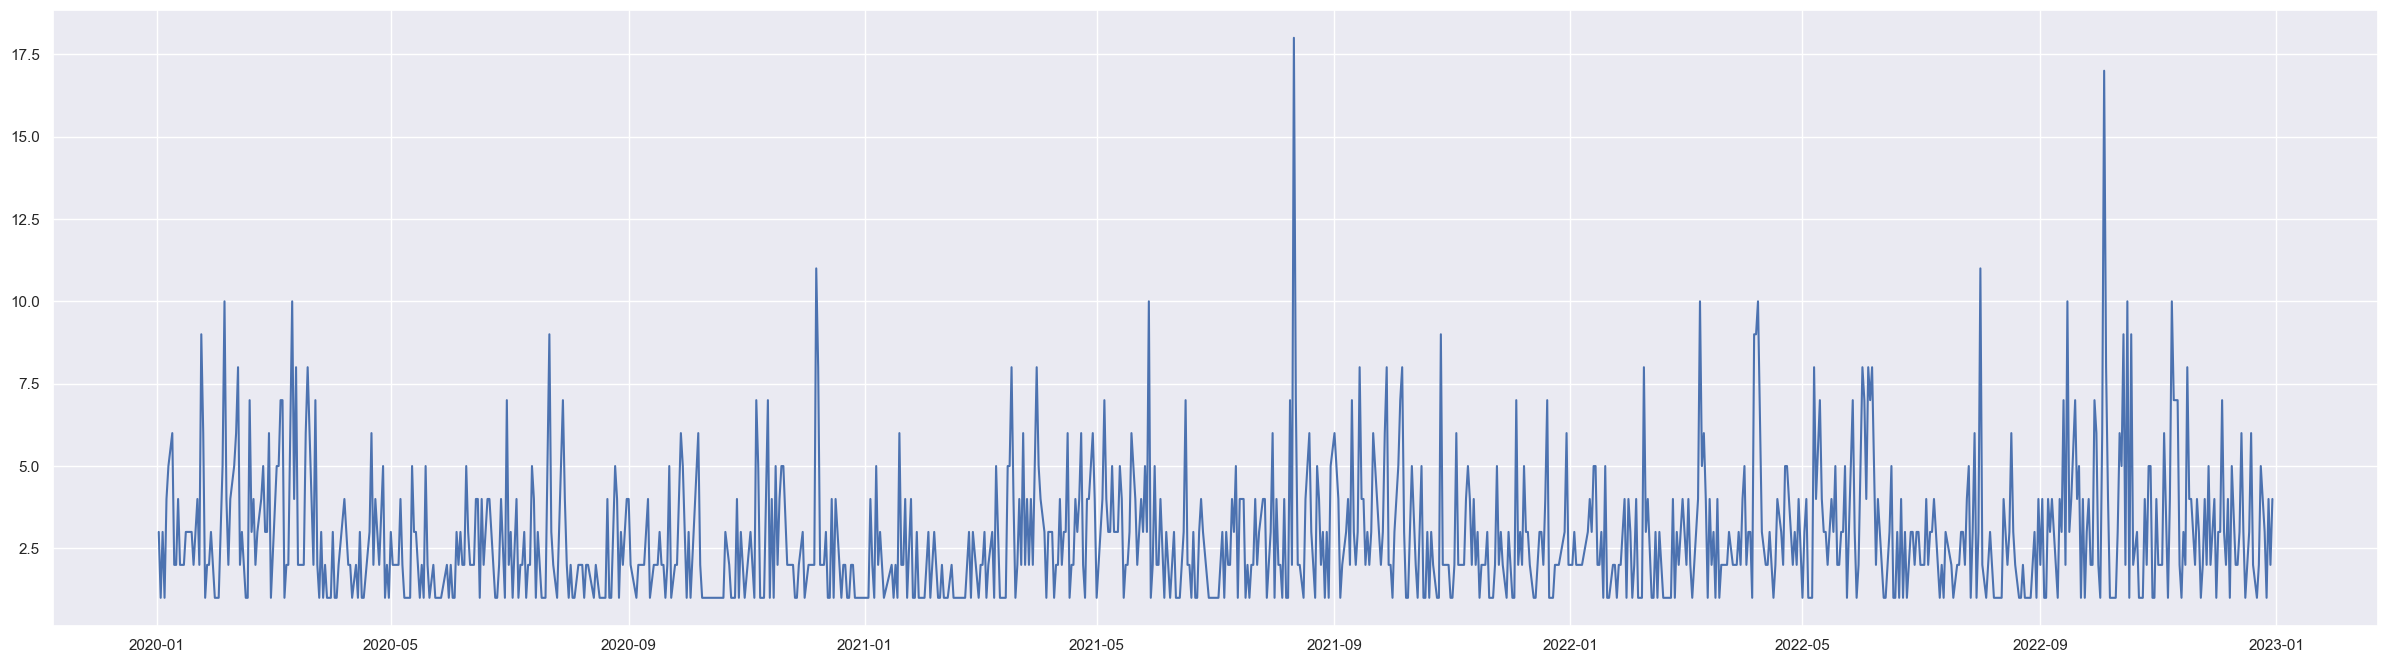

In [24]:
tweets_by_day = insurance_list.groupby("Date").count()
sns.set(rc={"figure.figsize":(30,8)})
plt.plot(tweets_by_day["Content"])
plt.show()

In [25]:
#Visualising unique values
def get_unique_values(data_frame):
    unique_frame = pd.DataFrame()
    unique_frame["Columns"] = data_frame.columns
    values = []
    for column in data_frame.columns:
        no_unique = data_frame[column].nunique()
        values.append(no_unique)
    unique_frame["Uniques"] = values
    return unique_frame

In [26]:
insurance_no_hashtags = insurance_list.drop(columns = ["Word Count"])
unique_data_frame = get_unique_values(insurance_no_hashtags)
print(unique_data_frame)

           Columns  Uniques
0             Date      938
1               Id     2729
2          Content     2722
3         Username     1228
4         Hashtags      509
5  Cleaned Content     2710


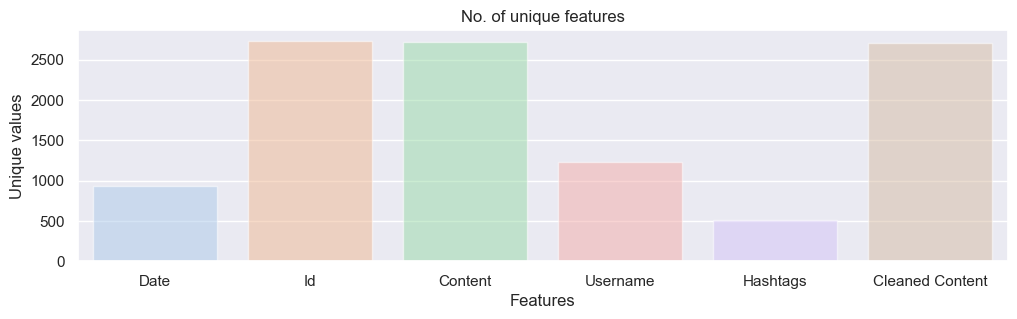

In [27]:
fig, axis = plt.subplots(1,1, figsize = (12,3))
col = sns.color_palette("pastel")
sns.set_theme(style = "whitegrid")
sns.barplot(x=unique_data_frame["Columns"],y=unique_data_frame["Uniques"],palette=col,alpha =0.5)
plt.title("No. of unique features")
plt.xlabel("Features")
plt.ylabel("Unique values")
plt.show()

In [28]:
def frequency_plot(df,title,feature,xlabel, color_scheme):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]

    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(x = df[feature],data=df, order = df[feature].value_counts().index[:20], palette=color_scheme)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center")

    plt.title(title)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(xlabel, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()


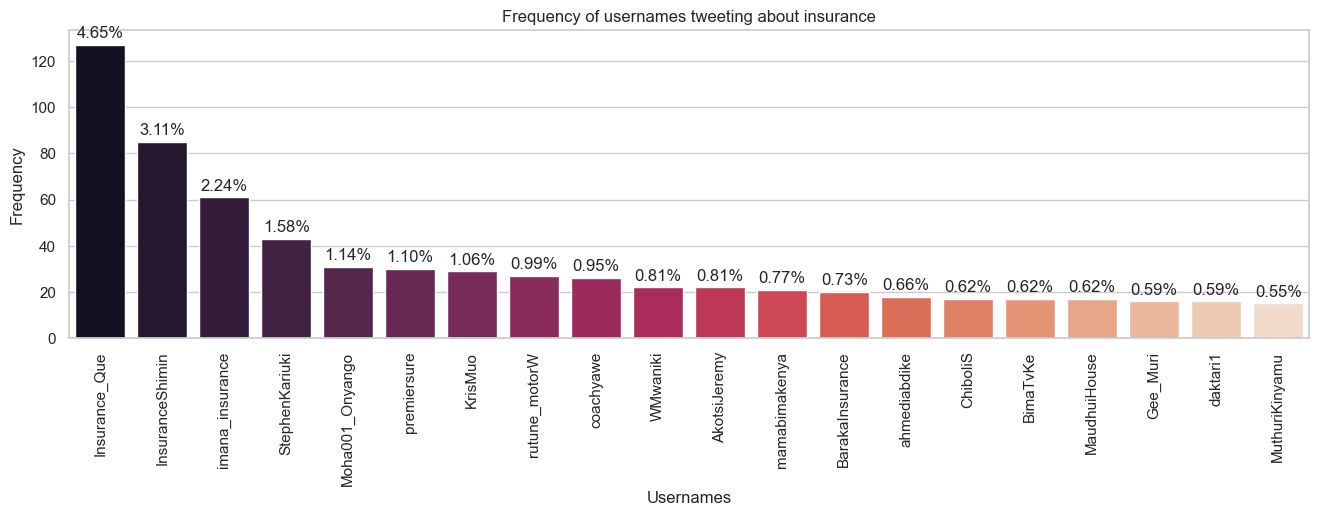

In [29]:
frequency_plot(insurance_list,"Frequency of usernames tweeting about insurance","Username","Usernames","rocket")

# 7. Sentiment Models

In [36]:
#TextBlob Model
def textblob_get_sentiment(text):
   text_blob_analyser = TextBlob(text)

   if text_blob_analyser.sentiment.polarity > 0:
      return "Positive"
   elif text_blob_analyser.sentiment.polarity == 0:
      return "Neutral"
   else:
      return "Negative"

textblob_tweet_sentiment = insurance_list["Cleaned Content"].apply(lambda text: textblob_get_sentiment(text))


#Vader Model
analyser = SentimentIntensityAnalyzer()
polarity_scores = insurance_list["Cleaned Content"].apply(lambda word: analyser.polarity_scores(word))
vader_sentiment_score = pd.concat([polarity_scores.apply(pd.Series)])
vader_sentiment_score.loc[vader_sentiment_score["compound"]== 0, "Label"] = "Neutral"
vader_sentiment_score.loc[vader_sentiment_score["compound"]> 0, "Label"] = "Positive"
vader_sentiment_score.loc[vader_sentiment_score["compound"]< 0, "Label"] = "Negative"
vader_sentiment_score.head()
vader_sentiment_score.to_csv("scores.csv")


In [31]:
insurance_list["TextBlob Sentiment"] = textblob_tweet_sentiment
insurance_list["Vader Sentiment"] = vader_sentiment_score["Label"]
insurance_list.to_csv("sentiment.csv")

In [32]:
positive_count = len(insurance_list[insurance_list["Vader Sentiment"] == "Positive"])
negative_count = len(insurance_list[insurance_list["Vader Sentiment"] == "Negative"])
neutral_count = len(insurance_list[insurance_list["Vader Sentiment"] == "Neutral"])


sentiment_data = (["Positive",positive_count],["Neutral",neutral_count],["Negative",negative_count])
sentiment_count = pd.DataFrame(sentiment_data,columns=["Sentiment","Count"])
sentiment_count

,Sentiment,Count
0,Positive,1283
1,Neutral,706
2,Negative,740


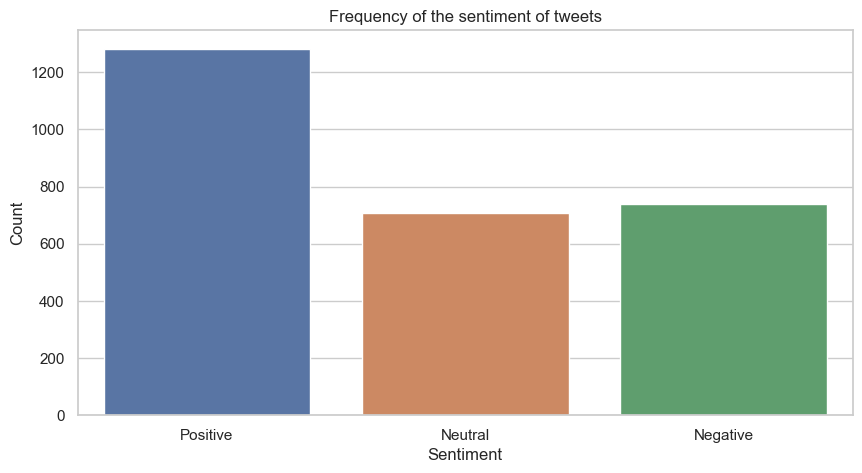

In [35]:
plt.figure(figsize=(10,5))
graph = sns.barplot(data = sentiment_count,x = "Sentiment",y="Count")

plt.title("Frequency of the sentiment of tweets")
plt.show()

In [44]:
new_stopwords = ["insurance", "cover","policy","underwriter", "insured", "insurer", "underwriter", "insure","amp","get","kenya"]
stop_words = stopwords.words("english")
stop_words.extend(new_stopwords)


In [45]:
negative_tweets = insurance_list[insurance_list["Vader Sentiment"]== "Negative"]
negative_text = " ".join(i for i in negative_tweets["Cleaned Content"])

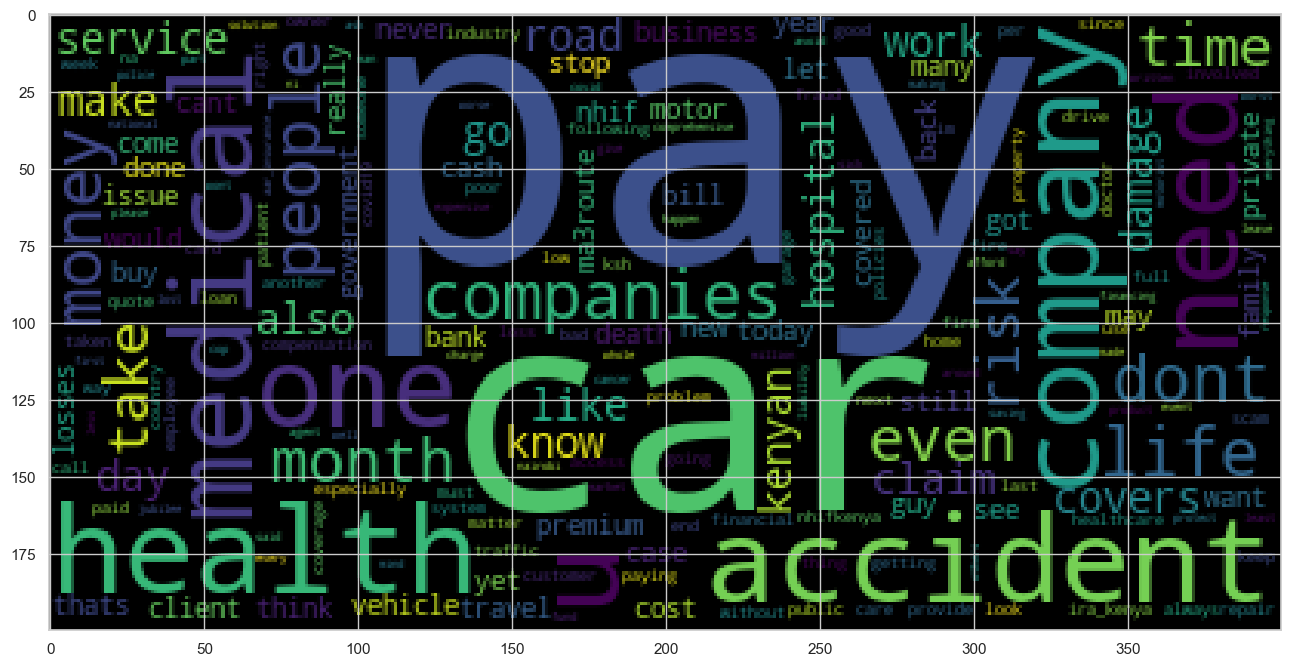

In [46]:
word_cloud_negative = WordCloud(stopwords=set(stop_words)).generate(negative_text)
plt.imshow(word_cloud_negative)
plt.show()

In [42]:
positive_tweets = insurance_list[insurance_list["Vader Sentiment"]== "Positive"]
positive_text = " ".join(i for i in positive_tweets["Cleaned Content"])

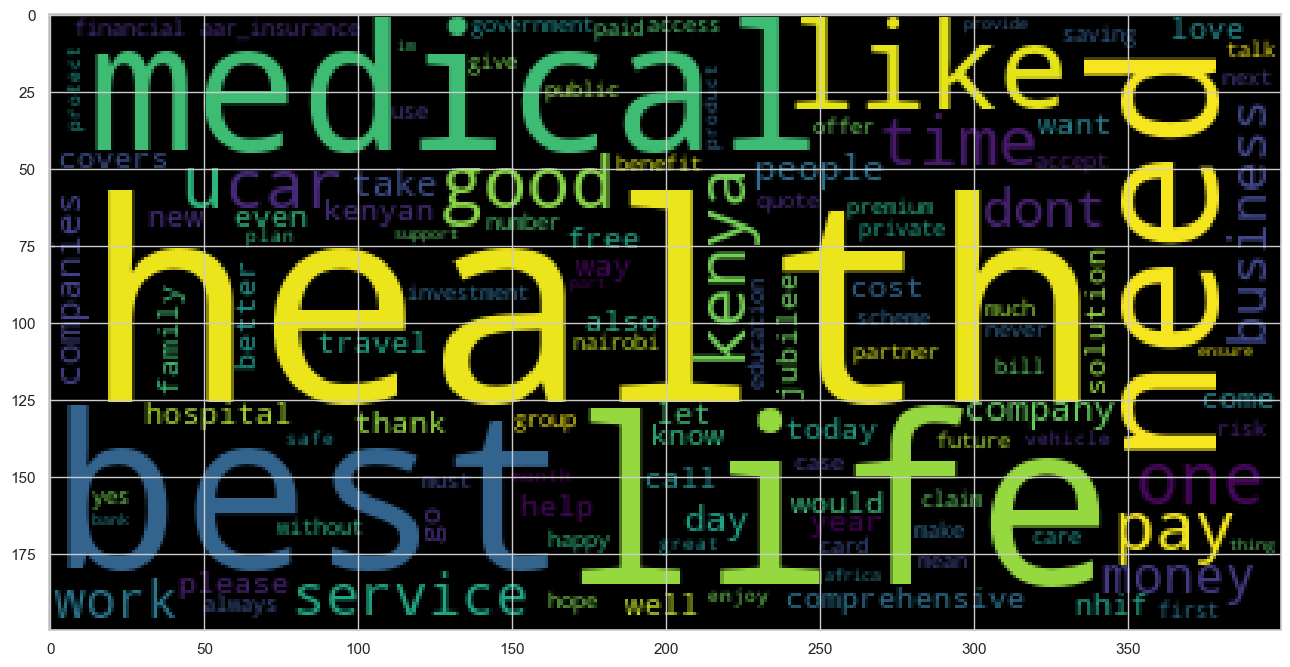

In [43]:
word_cloud_positive = WordCloud(stopwords=set(stop_words)).generate(positive_text)
plt.imshow(word_cloud_positive)
plt.show()

In [47]:
neutral_tweets = insurance_list[insurance_list["Vader Sentiment"]== "Neutral"]
neutral_text = " ".join(i for i in neutral_tweets["Cleaned Content"])

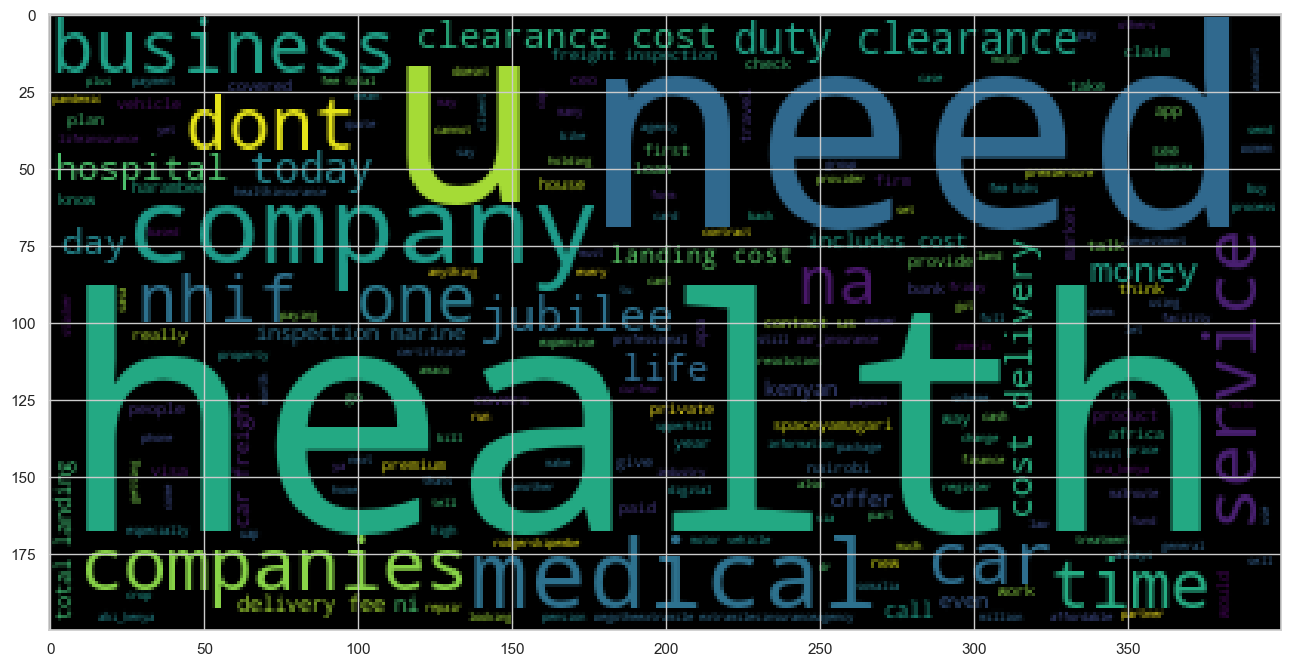

In [48]:
word_cloud_neutral = WordCloud(stopwords=set(stop_words)).generate(neutral_text)
plt.imshow(word_cloud_neutral)
plt.show()

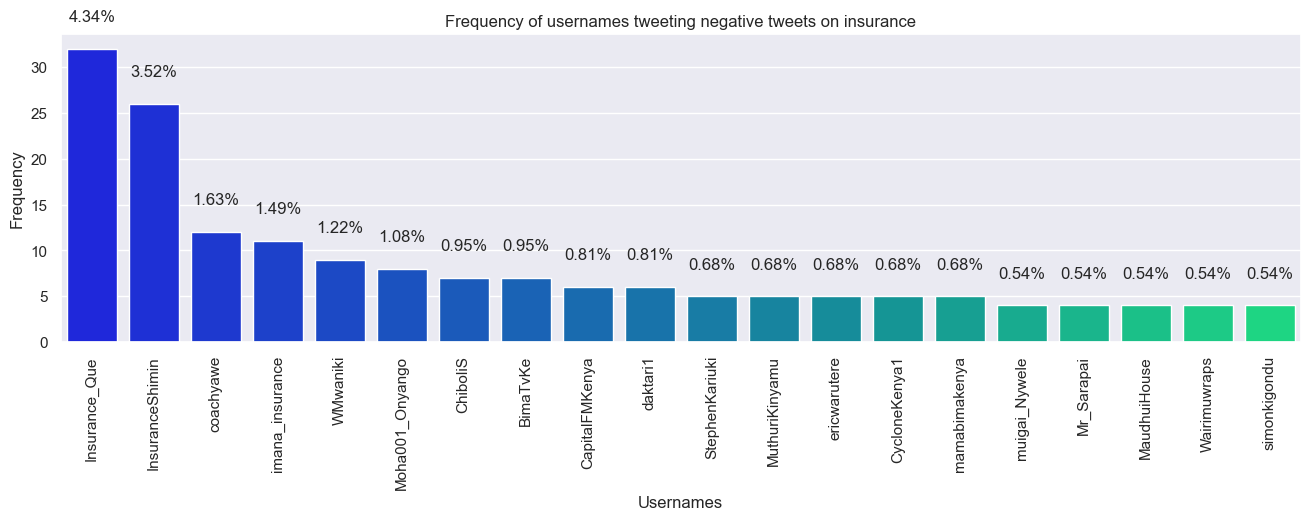

In [174]:
frequency_plot(negative_tweets,"Frequency of usernames tweeting negative tweets on insurance","Username","Usernames","winter")

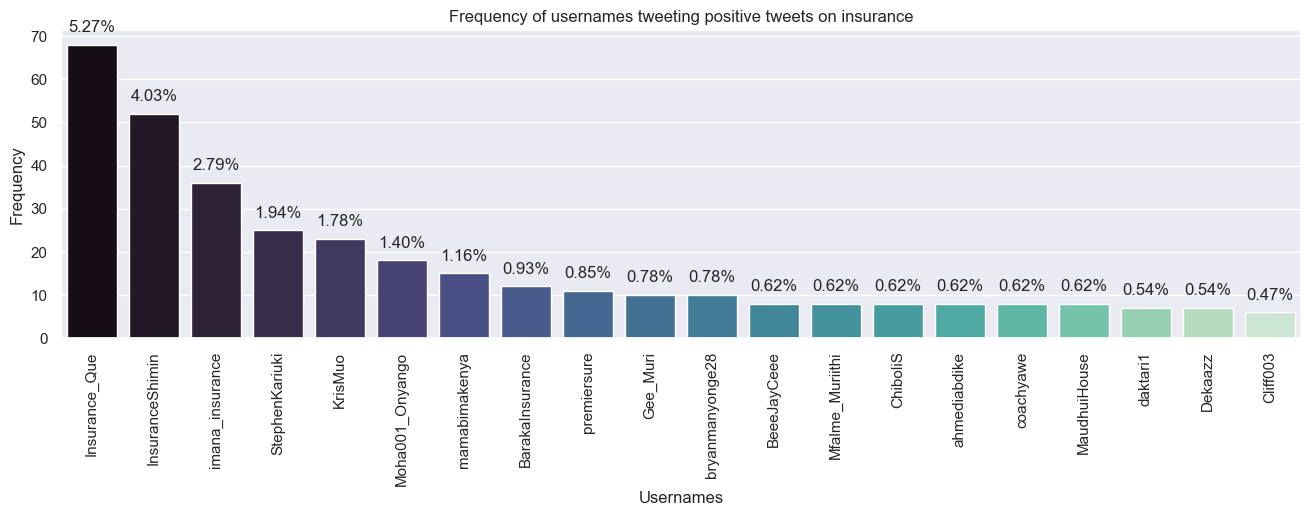

In [177]:
frequency_plot(positive_tweets,"Frequency of usernames tweeting positive tweets on insurance","Username","Usernames","mako")


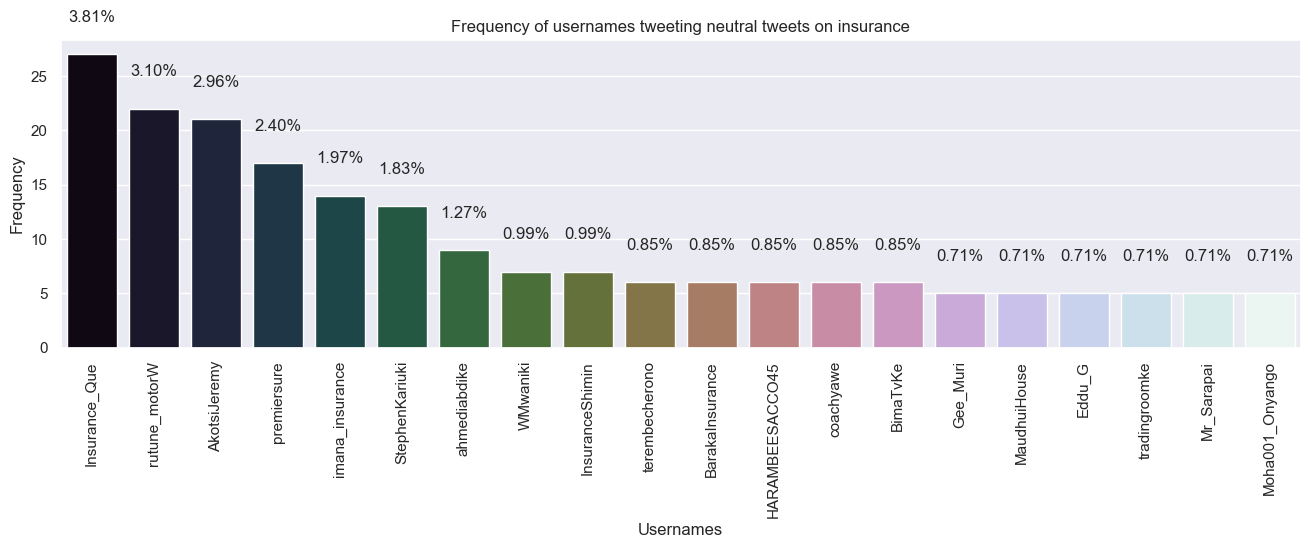

In [179]:
frequency_plot(neutral_tweets,"Frequency of usernames tweeting neutral tweets on insurance","Username","Usernames","cubehelix")
